In [1]:
%run config.ipynb

In [2]:
cortex = Cortex.client()

In [3]:
train_ds = cortex.dataset('kaggle/ames-housing-train')

In [4]:
pipeline = train_ds.pipeline('features', depends=['clean'], clear_cache=True)
pipeline.reset()

In [5]:
def scale_target(pipeline, df):
    df['SalePrice'] = np.log1p(df['SalePrice'])

pipeline.add_step(scale_target)

In [6]:
pipeline.dumps(notebook=True)

features:
  dependencies: [clean]
  steps:
  - function:
      code: !!binary |
        gANjZGlsbC5fZGlsbApfY3JlYXRlX2Z1bmN0aW9uCnEAKGNkaWxsLl9kaWxsCl9sb2FkX3R5cGUK
        cQFYCAAAAENvZGVUeXBlcQKFcQNScQQoSwJLAEsCSwNLQ0MWdABqAXwBZAEZAIMBfAFkATwAZABT
        AHEFTlgJAAAAU2FsZVByaWNlcQaGcQdYAgAAAG5wcQhYBQAAAGxvZzFwcQmGcQpYCAAAAHBpcGVs
        aW5lcQtYAgAAAGRmcQyGcQ1YHgAAADxpcHl0aG9uLWlucHV0LTUtYmY4ODE5NzY4YjY4PnEOWAwA
        AABzY2FsZV90YXJnZXRxD0sBQwIAAXEQKSl0cRFScRJjX19idWlsdGluX18KX19tYWluX18KaA9O
        Tn1xE3RxFFJxFS4=
      name: scale_target
      type: inline
    name: scale_target


In [7]:
train_df = pipeline.run()

running pipeline [clean] for dataset [kaggle/ames-housing-train]:
> drop_unused 
> drop_outliers 
> fill_zero_cols 
> fill_median_cols 
> fill_na_none 
running pipeline [features] for dataset [kaggle/ames-housing-train]:
> scale_target 


In [10]:
viz = train_ds.visuals(train_df, figsize=(18, 9))

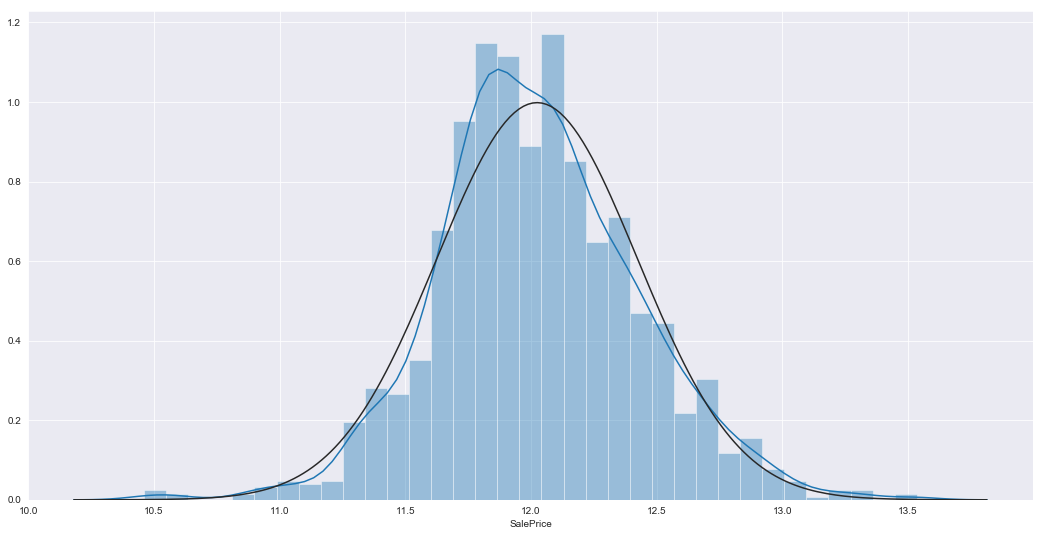

<Figure size 1296x648 with 0 Axes>

In [11]:
viz.show_dist('SalePrice')

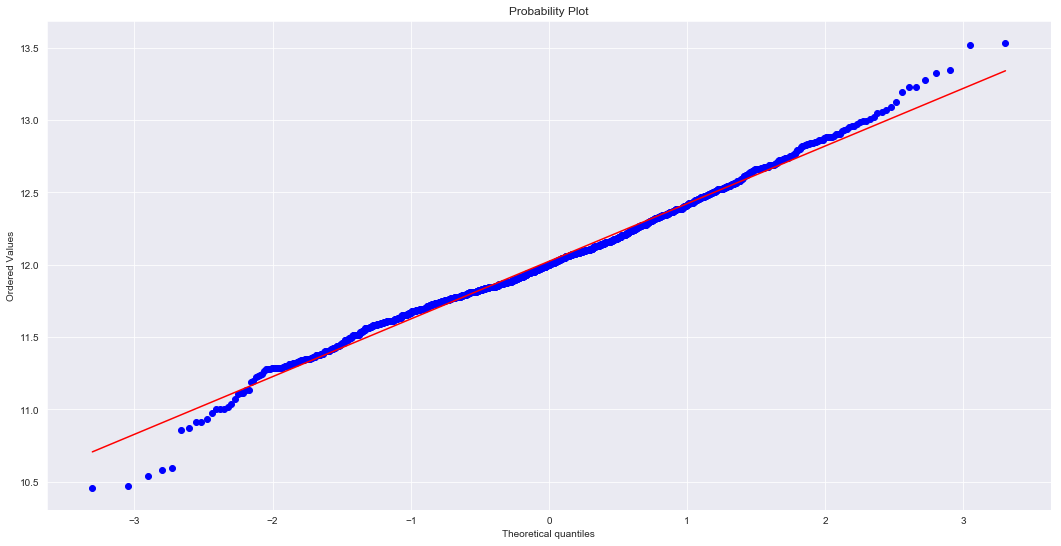

<Figure size 1296x648 with 0 Axes>

In [12]:
viz.show_probplot('SalePrice')